In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [3]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [4]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [5]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [6]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [7]:
# What is the empirical range of dates?
min(data.index)

Timestamp('1950-01-01 00:00:00')

In [8]:
max(data.index)

Timestamp('2017-07-01 00:00:00')

In [9]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
data['1951-11-11':'1951-11-12']

,value
month,


In [11]:
# What if we want a period index?
data_pd = data.to_period()

In [12]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [13]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


### Which is more appropriate for this data?
Periods make more sense for this data since they represent monthly averages, not something that occurred at a specific time.

In [14]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
421 ms ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, no date parser
350 ms ± 57.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = True, date parser provided
533 ms ± 262 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
infer_datetime_format = False, date parser provided
441 ms ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [16]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [17]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [18]:
# Does it work with other column names?
pd.to_datetime(df[['year', 'month', 'day', 'hour']])

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [19]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('/Users/klane/projects/databall/data/nba.db')
df = pd.read_sql('''SELECT GAME_DATE AS DATE, AVG(PTS) AS PTS
                    FROM team_game_stats
                    JOIN games
                    ON team_game_stats.GAME_ID=games.ID
                    GROUP BY GAME_DATE''', conn)

In [20]:
# 1. plot 2. get range of dates 3. convert between time and period index
df.head()

,DATE,PTS
0,1989-11-03,108.625000
1,1989-11-04,107.100000
2,1989-11-05,88.000000
3,1989-11-06,114.000000
4,1989-11-07,103.333333


In [21]:
df.index = pd.DatetimeIndex(df.DATE)
df = df.drop('DATE', 1)
df.head()

,PTS
DATE,
1989-11-03,108.625000
1989-11-04,107.100000
1989-11-05,88.000000
1989-11-06,114.000000
1989-11-07,103.333333


In [22]:
min(df.index)

Timestamp('1989-11-03 00:00:00')

In [23]:
max(df.index)

Timestamp('2017-04-12 00:00:00')

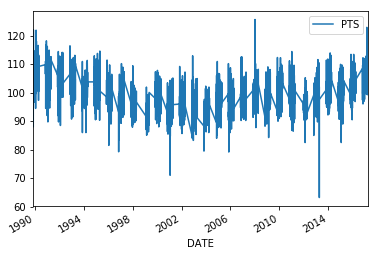

In [24]:
df.plot()
plt.show()

In [25]:
df = pd.read_sql('''SELECT SEASON, AVG(PTS) AS PTS
                    FROM team_game_stats
                    JOIN games
                    ON team_game_stats.GAME_ID=games.ID
                    GROUP BY SEASON''', conn)

In [26]:
df.head()

,SEASON,PTS
0,1989,106.992773
1,1990,106.309846
2,1991,105.308943
3,1992,105.272358
4,1993,101.507227


In [27]:
df.index = pd.DatetimeIndex([str(s) for s in df.SEASON])
df = df.drop('SEASON', 1)
df.head()

,PTS
1989-01-01,106.992773
1990-01-01,106.309846
1991-01-01,105.308943
1992-01-01,105.272358
1993-01-01,101.507227


In [28]:
min(df.index)

Timestamp('1989-01-01 00:00:00')

In [29]:
max(df.index)

Timestamp('2016-01-01 00:00:00')

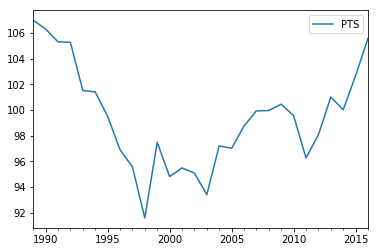

In [30]:
df.plot()
plt.show()

In [31]:
df = df.to_period()
df.head()

,PTS
1989,106.992773
1990,106.309846
1991,105.308943
1992,105.272358
1993,101.507227


In [32]:
min(df.index)

Period('1989', 'A-DEC')

In [33]:
max(df.index)

Period('2016', 'A-DEC')

In [34]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [35]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [36]:
# It will save you when it can
ts.iloc[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')